In [1]:
# Tensorflow
import numpy as np
import pandas as pd
import glob
import imageio
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU, LSTM
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import time
from IPython import display
from scipy.signal import savgol_filter
from sklearn.model_selection import train_test_split

2024-11-20 08:18:55.320234: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 08:18:55.341778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732065535.369961  555139 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732065535.383867  555139 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 08:18:55.430518: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Data

In [2]:
data = pd.read_csv("/home/sonn/Sonn/Workspace/Projects/GANSpectralDataAugmentation/data/UV_Vis_NuocCam_ChuaDaoHam.csv")

In [3]:
data.head()

,TenMau,DiaPhuong,NamLayMau,Giong,1000,995,990,985,980,975,...,300,295,290,285,280,275,270,265,260,255
0,BG.23.Vinh.01,Bắc Giang,2023,Vinh,0.672,0.670,0.667,0.666,0.664,0.663,...,1.787,1.860,1.948,2.032,2.091,2.121,2.134,2.144,2.157,2.182
1,BG.23.Vinh.02,Bắc Giang,2023,Vinh,1.219,1.221,1.221,1.221,1.220,1.219,...,2.295,2.370,2.462,2.551,2.611,2.627,2.608,2.567,2.516,2.479
2,BG.23.Vinh.04,Bắc Giang,2023,Vinh,1.241,1.240,1.240,1.240,1.237,1.235,...,2.647,2.717,2.815,2.932,3.064,3.208,3.375,3.583,3.848,4.157
3,BG.23.Vinh.05,Bắc Giang,2023,Vinh,1.297,1.298,1.300,1.301,1.300,1.301,...,2.417,2.479,2.559,2.641,2.714,2.773,2.828,2.889,2.955,3.024
4,BG.23.Vinh.07,Bắc Giang,2023,Vinh,1.311,1.312,1.314,1.312,1.310,1.307,...,2.428,2.516,2.631,2.755,2.858,2.922,2.950,2.951,2.939,2.934


In [4]:
y = data['DiaPhuong']

In [5]:
X = data.iloc[:, 4:]

(0.0, 149.0)

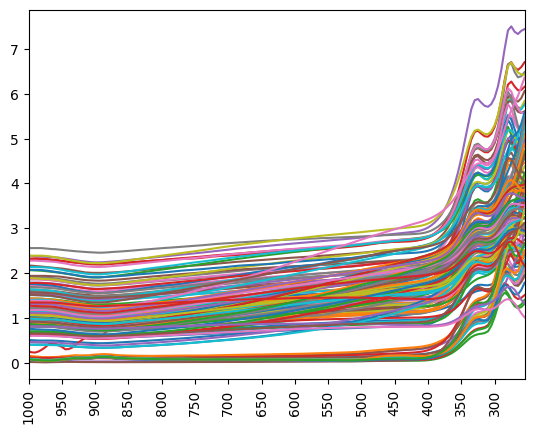

In [6]:
plt.plot(X.T)
plt.xticks(X.columns[::10], rotation=90)
plt.xlim(X.columns[0], X.columns[-1])

In [7]:
X = savgol_filter(X, window_length=5, polyorder=2, deriv=1)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

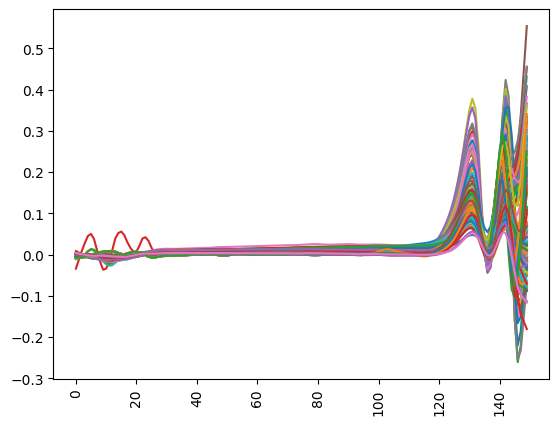

In [8]:
plt.plot(X.T)
plt.xticks(rotation=90)

In [9]:
X[y == 'Bắc Giang']

array([[-2.57142857e-03, -2.28571429e-03, -2.00000000e-03, ...,
         1.45000000e-02,  1.83571429e-02,  2.22142857e-02],
       [ 1.91428571e-03,  1.05714286e-03,  2.00000000e-04, ...,
        -3.88000000e-02, -4.53714286e-02, -5.19428571e-02],
       [ 3.42857143e-04, -2.28571429e-04, -8.00000000e-04, ...,
         2.37100000e-01,  2.85814286e-01,  3.34528571e-01],
       ...,
       [ 2.65714286e-03,  1.22857143e-03, -2.00000000e-04, ...,
         1.30000000e-03, -9.98571429e-03, -2.12714286e-02],
       [ 3.08571429e-03,  1.94285714e-03,  8.00000000e-04, ...,
         5.81000000e-02,  6.31000000e-02,  6.81000000e-02],
       [ 2.08571429e-03,  9.42857143e-04, -2.00000000e-04, ...,
        -7.08000000e-02, -6.96571429e-02, -6.85142857e-02]])

In [10]:
X.shape

(147, 150)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 150), (30, 150), (117,), (30,))

In [12]:
# X_der = X_der.reshape(X_der.shape[0], X_der.shape[1], 1)

In [13]:
# X_der.shape

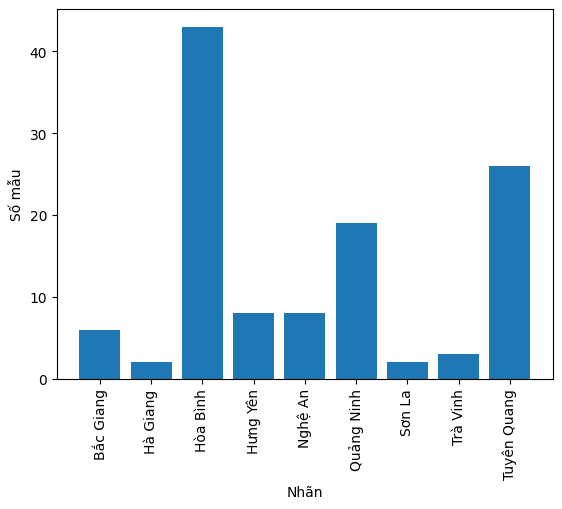

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Nhãn')
plt.xticks(rotation=90)
plt.ylabel('Số mẫu')
plt.show()

In [15]:
X_train.shape

(117, 150)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((117, 150, 1), (117,), (30, 150, 1), (30,))

In [18]:
noise_dim = 100
length = X_train.shape[1]
feature_dim = X_train.shape[1]


Model

In [19]:
LENGTH = length
BATCH_SIZE = 8
EPOCHS = 100
Z_DIM = noise_dim

In [20]:
def make_generator_model():

    model = tf.keras.Sequential()

    model.add(layers.Input(shape=(noise_dim,1)))
    model.add(layers.Dropout(0.02))
    
    model.add(LSTM(256, return_sequences=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01)) 
    model.add(layers.Dropout(0.02))

    model.add(LSTM(125))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01)) 
    model.add(layers.Dropout(0.02))

    model.add(layers.Dense(150))

    
    
    return model

In [21]:
generator = make_generator_model()
generator.summary()

2024-11-20 08:19:00.795700: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-11-20 08:19:00.795740: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: sonn
2024-11-20 08:19:00.795750: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: sonn
2024-11-20 08:19:00.795951: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.120.0
2024-11-20 08:19:00.795979: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.120.0
2024-11-20 08:19:00.795987: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.120.0
/home/sonn/anaconda3/envs/WSAIPython3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: U

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 256)       │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 125)            │       191,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125)            │           500 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        18,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,616 (1.81 MB)

 Trainable params: 474,854 (1.81 MB)

 Non-trainable params: 762 (2.98 KB)

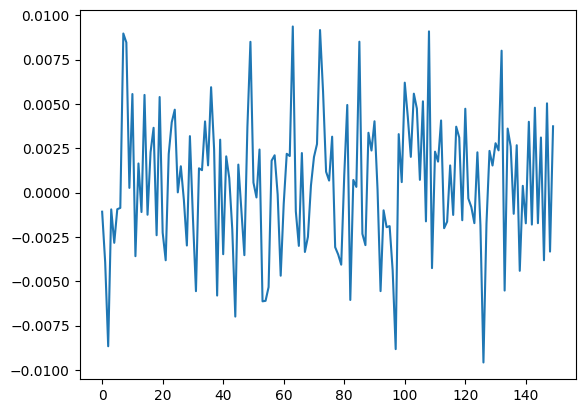

In [22]:
noise = tf.random.normal([1, noise_dim])
generated_data = generator(noise, training=False)
generated_data_ = generated_data.numpy().reshape(-1).tolist()
plt.plot(generated_data_)

In [23]:
generated_data.shape

TensorShape([1, 150])

In [24]:
def make_discriminator_model():
    
    model = tf.keras.Sequential()
    
    model.add(layers.Input(shape={feature_dim}))
    model.add(layers.Reshape([feature_dim, 1]))
    model.add(layers.Conv1D(kernel_size= 15, filters= 256, activation='leaky_relu'))  
    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                      
    
    model.add(layers.Conv1D(kernel_size= 15, filters= 128))   
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
        
    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                     

    model.add(layers.Flatten())
    model.add(layers.Dense(64))                                                       
    model.add(layers.Dense(1))
    model.compile()
    
    return model

In [25]:
discriminator = make_discriminator_model()          
decision = discriminator(generated_data)            
print (decision)                                
discriminator.summary()

tf.Tensor([[0.00038626]], shape=(1, 1), dtype=float32)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 150, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 136, 256)       │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 68, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 68, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 54, 128)        │       491,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 54, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 54, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       221,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,569 (2.74 MB)

 Trainable params: 717,313 (2.74 MB)

 Non-trainable params: 256 (1.00 KB)

In [26]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)


def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [27]:
seed = tf.random.normal([1, noise_dim])        

def generate_data(model, num_synthetic_to_gen=1):
  noise_input = tf.random.normal([num_synthetic_to_gen, noise_dim])
  predictions = model(noise_input, training=False)
  predictions = predictions.numpy()
  return predictions

def calc_accuracy(prediction):
  correct_predictions = tf.cast(prediction < 0.5, tf.float32)
  accuracy = tf.reduce_mean(correct_predictions)
  return accuracy

In [28]:
numofEPOCHS = 8000
BATCH_SIZE = 12 

In [29]:
def draw_training_evolution(model, epoch, noise_input= noise):
  predictions = model(noise_input, training=False)
  
  for i in range(predictions.shape[0]):
        fig = plt.figure()
        plt.plot(predictions[i].numpy().tolist())
        plt.savefig('../reports/LSTM-GAN/image_at_epoch_{:04d}_{:04d}.png'.format(epoch, i))
        plt.close()

In [30]:

def train_step(data, generator, discriminator, generator_optimizer, discriminator_optimizer):
    noise = tf.random.normal([BATCH_SIZE, noise_dim], seed=42)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_data = generator(noise, training=True)

      real_output = discriminator(data, training=True)
      fake_output = discriminator(generated_data, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      acc = calc_accuracy(fake_output)
     
        

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, acc

def train(dataset, epochs, generator, discriminator, generator_optimizer, discriminator_optimizer):
  
  for epoch in range(epochs):
    start_time = time.time()

    gen_losses, disc_losses, accuracies = [], [], []

    for data_batch in dataset:
      gen_loss, disc_loss, acc = train_step(data_batch, generator, discriminator, generator_optimizer, discriminator_optimizer)
      accuracies.append(acc)
      gen_losses.append(gen_loss)
      disc_losses.append(disc_loss)

    epoch_gen_loss  = np.average(gen_losses)
    epoch_disc_loss = np.average(disc_losses)
    epoch_accuracy = np.average(accuracies)

    if (epoch + 1) % 100 == 0:
      draw_training_evolution(generator, epoch+1)
   
    print("Epoch: {}/{}".format(epoch+1, epochs))
    print("Generator Loss: {}, Discriminator Loss: {}".format(epoch_gen_loss, epoch_disc_loss))
    print("Accuracy: {}".format(epoch_accuracy))
    print(f"Epoch time: {(time.time() - start_time) * 1000}" )
        

In [31]:
for name in ['Bắc Giang']:
    X_tmp = X_train[y_train == name]
    generator = make_generator_model()
    discriminator = make_discriminator_model()
    generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    data_size = X_tmp.shape[0]        
    train_dataset = tf.data.Dataset.from_tensor_slices(X_tmp).shuffle(data_size).batch(BATCH_SIZE)  
    train(train_dataset, numofEPOCHS, generator, discriminator, generator_optimizer, discriminator_optimizer)
    generator.save(f"../models/LSTM-GAN_{name}_epoch_{numofEPOCHS}.h5")

2024-11-20 08:19:05.244246: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 1/8000
Generator Loss: 0.6732596755027771, Discriminator Loss: 1.5801421403884888
Accuracy: 0.5833333134651184
Epoch time: 2310.5220794677734


2024-11-20 08:19:06.791687: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 2/8000
Generator Loss: 4.315768718719482, Discriminator Loss: 0.7370908856391907
Accuracy: 1.0
Epoch time: 1546.9799041748047
Epoch: 3/8000
Generator Loss: 6.82539176940918, Discriminator Loss: 0.6798305511474609
Accuracy: 1.0
Epoch time: 1516.5307521820068


2024-11-20 08:19:09.977053: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 4/8000
Generator Loss: 7.9805121421813965, Discriminator Loss: 0.6543220281600952
Accuracy: 1.0
Epoch time: 1668.6081886291504
Epoch: 5/8000
Generator Loss: 7.562631607055664, Discriminator Loss: 0.6032391786575317
Accuracy: 1.0
Epoch time: 1726.569652557373
Epoch: 6/8000
Generator Loss: 7.20172119140625, Discriminator Loss: 0.5748777389526367
Accuracy: 1.0
Epoch time: 1904.0260314941406
Epoch: 7/8000
Generator Loss: 6.866265773773193, Discriminator Loss: 0.5156528353691101
Accuracy: 1.0
Epoch time: 1716.7658805847168


2024-11-20 08:19:16.924027: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 8/8000
Generator Loss: 6.161479949951172, Discriminator Loss: 0.4720443785190582
Accuracy: 1.0
Epoch time: 1599.4584560394287
Epoch: 9/8000
Generator Loss: 6.122509002685547, Discriminator Loss: 0.42818963527679443
Accuracy: 1.0
Epoch time: 1390.6850814819336
Epoch: 10/8000
Generator Loss: 5.734158992767334, Discriminator Loss: 0.39502230286598206
Accuracy: 1.0
Epoch time: 1575.4354000091553
Epoch: 11/8000
Generator Loss: 5.059004306793213, Discriminator Loss: 0.36208784580230713
Accuracy: 1.0
Epoch time: 1839.7958278656006
Epoch: 12/8000
Generator Loss: 4.858997344970703, Discriminator Loss: 0.3287753760814667
Accuracy: 1.0
Epoch time: 2184.296131134033
Epoch: 13/8000
Generator Loss: 4.322708606719971, Discriminator Loss: 0.299186110496521
Accuracy: 1.0
Epoch time: 1323.0011463165283
Epoch: 14/8000
Generator Loss: 4.920936107635498, Discriminator Loss: 0.2585388422012329
Accuracy: 1.0
Epoch time: 1263.6303901672363
Epoch: 15/8000
Generator Loss: 4.454141139984131, Discriminator

2024-11-20 08:19:29.125753: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 16/8000
Generator Loss: 5.8141188621521, Discriminator Loss: 0.20926278829574585
Accuracy: 1.0
Epoch time: 1315.2563571929932
Epoch: 17/8000
Generator Loss: 5.769166469573975, Discriminator Loss: 0.19898535311222076
Accuracy: 1.0
Epoch time: 1237.0967864990234
Epoch: 18/8000
Generator Loss: 4.732401371002197, Discriminator Loss: 0.1829029619693756
Accuracy: 1.0
Epoch time: 1231.3299179077148
Epoch: 19/8000
Generator Loss: 5.426065921783447, Discriminator Loss: 0.16325995326042175
Accuracy: 1.0
Epoch time: 1427.2091388702393
Epoch: 20/8000
Generator Loss: 5.187241554260254, Discriminator Loss: 0.14114010334014893
Accuracy: 1.0
Epoch time: 1752.488136291504
Epoch: 21/8000
Generator Loss: 3.9899957180023193, Discriminator Loss: 0.19452574849128723
Accuracy: 1.0
Epoch time: 1169.060230255127
Epoch: 22/8000
Generator Loss: 5.886744976043701, Discriminator Loss: 0.12250739336013794
Accuracy: 1.0
Epoch time: 1256.319522857666
Epoch: 23/8000
Generator Loss: 5.939355850219727, Discrimina

2024-11-20 08:19:48.055302: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 32/8000
Generator Loss: 7.468420028686523, Discriminator Loss: 0.09534377604722977
Accuracy: 1.0
Epoch time: 841.6507244110107
Epoch: 33/8000
Generator Loss: 7.035111904144287, Discriminator Loss: 0.10233987122774124
Accuracy: 1.0
Epoch time: 868.6919212341309
Epoch: 34/8000
Generator Loss: 6.314469814300537, Discriminator Loss: 0.09222620725631714
Accuracy: 1.0
Epoch time: 972.9018211364746
Epoch: 35/8000
Generator Loss: 5.2318902015686035, Discriminator Loss: 0.10964265465736389
Accuracy: 1.0
Epoch time: 840.4603004455566
Epoch: 36/8000
Generator Loss: 6.54269552230835, Discriminator Loss: 0.09339023381471634
Accuracy: 1.0
Epoch time: 948.4913349151611
Epoch: 37/8000
Generator Loss: 6.0257110595703125, Discriminator Loss: 0.08258749544620514
Accuracy: 1.0
Epoch time: 845.7674980163574
Epoch: 38/8000
Generator Loss: 6.2095184326171875, Discriminator Loss: 0.0855129063129425
Accuracy: 1.0
Epoch time: 913.5932922363281
Epoch: 39/8000
Generator Loss: 5.64844274520874, Discriminato

2024-11-20 08:20:18.447791: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 64/8000
Generator Loss: 4.964603900909424, Discriminator Loss: 0.1115429699420929
Accuracy: 1.0
Epoch time: 936.8083477020264
Epoch: 65/8000
Generator Loss: 9.737908363342285, Discriminator Loss: 0.06894291937351227
Accuracy: 1.0
Epoch time: 908.0331325531006
Epoch: 66/8000
Generator Loss: 10.623578071594238, Discriminator Loss: 0.0782066062092781
Accuracy: 1.0
Epoch time: 833.512544631958
Epoch: 67/8000
Generator Loss: 9.823843955993652, Discriminator Loss: 0.07991011440753937
Accuracy: 1.0
Epoch time: 825.5739212036133
Epoch: 68/8000
Generator Loss: 10.518672943115234, Discriminator Loss: 0.07626914978027344
Accuracy: 1.0
Epoch time: 975.7881164550781
Epoch: 69/8000
Generator Loss: 9.732161521911621, Discriminator Loss: 0.047411613166332245
Accuracy: 1.0
Epoch time: 1046.5173721313477
Epoch: 70/8000
Generator Loss: 8.167954444885254, Discriminator Loss: 0.048940494656562805
Accuracy: 1.0
Epoch time: 996.117115020752
Epoch: 71/8000
Generator Loss: 7.125016689300537, Discriminat

2024-11-20 08:21:12.418743: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 128/8000
Generator Loss: 10.418769836425781, Discriminator Loss: 0.01379223819822073
Accuracy: 1.0
Epoch time: 781.5854549407959
Epoch: 129/8000
Generator Loss: 6.789424419403076, Discriminator Loss: 0.05661340802907944
Accuracy: 1.0
Epoch time: 793.1573390960693
Epoch: 130/8000
Generator Loss: 11.705666542053223, Discriminator Loss: 0.020657576620578766
Accuracy: 1.0
Epoch time: 749.0081787109375
Epoch: 131/8000
Generator Loss: 14.67441463470459, Discriminator Loss: 0.031544800847768784
Accuracy: 1.0
Epoch time: 764.4617557525635
Epoch: 132/8000
Generator Loss: 15.330561637878418, Discriminator Loss: 0.0376322865486145
Accuracy: 1.0
Epoch time: 768.211841583252
Epoch: 133/8000
Generator Loss: 14.46997356414795, Discriminator Loss: 0.025919577106833458
Accuracy: 1.0
Epoch time: 770.374059677124
Epoch: 134/8000
Generator Loss: 13.105888366699219, Discriminator Loss: 0.028471244499087334
Accuracy: 1.0
Epoch time: 785.6199741363525
Epoch: 135/8000
Generator Loss: 11.970481872558594

2024-11-20 08:23:24.340522: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 256/8000
Generator Loss: 11.561680793762207, Discriminator Loss: 0.0036899540573358536
Accuracy: 1.0
Epoch time: 1304.5077323913574
Epoch: 257/8000
Generator Loss: 11.323657989501953, Discriminator Loss: 0.004383810330182314
Accuracy: 1.0
Epoch time: 996.0479736328125
Epoch: 258/8000
Generator Loss: 9.683660507202148, Discriminator Loss: 0.0030361555982381105
Accuracy: 1.0
Epoch time: 1299.2143630981445
Epoch: 259/8000
Generator Loss: 12.71650218963623, Discriminator Loss: 0.0013155218912288547
Accuracy: 1.0
Epoch time: 1327.8331756591797
Epoch: 260/8000
Generator Loss: 7.689295291900635, Discriminator Loss: 0.005914604291319847
Accuracy: 1.0
Epoch time: 1338.8254642486572
Epoch: 261/8000
Generator Loss: 6.721704006195068, Discriminator Loss: 0.005570428911596537
Accuracy: 1.0
Epoch time: 1292.9720878601074
Epoch: 262/8000
Generator Loss: 9.935978889465332, Discriminator Loss: 0.004351535812020302
Accuracy: 1.0
Epoch time: 1516.3447856903076
Epoch: 263/8000
Generator Loss: 9.616

2024-11-20 08:27:24.365689: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 512/8000
Generator Loss: 15.076159477233887, Discriminator Loss: 0.0008117846446111798
Accuracy: 1.0
Epoch time: 814.2015933990479
Epoch: 513/8000
Generator Loss: 15.411900520324707, Discriminator Loss: 0.0011976556852459908
Accuracy: 1.0
Epoch time: 824.5742321014404
Epoch: 514/8000
Generator Loss: 17.069894790649414, Discriminator Loss: 0.0018036238616332412
Accuracy: 1.0
Epoch time: 831.3050270080566
Epoch: 515/8000
Generator Loss: 16.040788650512695, Discriminator Loss: 0.0034088946413248777
Accuracy: 1.0
Epoch time: 825.7496356964111
Epoch: 516/8000
Generator Loss: 11.351712226867676, Discriminator Loss: 0.0013968407874926925
Accuracy: 1.0
Epoch time: 925.7869720458984
Epoch: 517/8000
Generator Loss: 11.057723045349121, Discriminator Loss: 0.0011514946818351746
Accuracy: 1.0
Epoch time: 813.3127689361572
Epoch: 518/8000
Generator Loss: 13.154162406921387, Discriminator Loss: 0.0014352725120261312
Accuracy: 1.0
Epoch time: 818.7351226806641
Epoch: 519/8000
Generator Loss: 12

KeyboardInterrupt: 

In [ ]:
gen_BG = load_model('../models/LSTM-GAN_Bắc Giang_epoch_5000.h5')

In [ ]:
data = generate_data(gen_BG)

In [ ]:
def get_rmse(synthetic_datapoint, original_datapoint):
    return np.sqrt(np.average((synthetic_datapoint - original_datapoint)**2))


def get_rmse_on_batch(synthetic_data, test_dataset):
    rmse_all = []

    for gen in synthetic_data:
        rmse = np.inf
        for test_datapoint in test_dataset:
            current_rmse = get_rmse(gen, test_datapoint)
            if current_rmse < rmse:
                rmse = current_rmse
        rmse_all.append(rmse)

    return np.average(rmse_all) 

In [ ]:
def get_mae(synthetic_datapoint, original_datapoint):
    return np.average(np.abs(synthetic_datapoint - original_datapoint))

def get_mae_on_batch(synthetic_data, test_dataset):
    mae_all = []

    for gen in synthetic_data:
        mae = np.inf
        for test_datapoint in test_dataset:
            current_mae = get_mae(gen, test_datapoint)
            if current_mae < mae:
                mae = current_mae
        mae_all.append(mae)

    return np.average(mae_all) 

In [ ]:
test_data = X[y == 'Bắc Giang']
batch = generate_data(gen_BG, num_synthetic_to_gen= 5)
rmse_ = get_rmse_on_batch(batch, test_data)
mae_ = get_mae_on_batch(batch, test_data)
print(f"---------{name}------------")
print("RMSe at Testing Dataset: {}".format(rmse_))
print("MAE at Testing Dataset: {}".format(mae_))

---------Bắc Giang------------
RMSe at Testing Dataset: 0.02173150481619637
MAE at Testing Dataset: 0.008780375033991195


In [ ]:
test_data.shape

(7, 150)

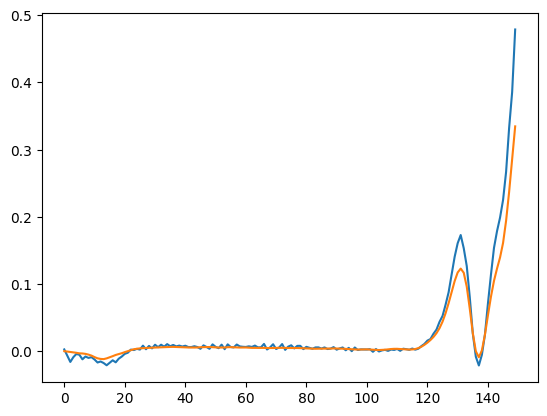

In [ ]:
gen_data = generate_data(gen_BG, 10)
plt.plot(gen_data[2].T)
plt.plot(np.squeeze(test_data)[2].T)

In [ ]:
generated_batch = generate_data(generator, num_synthetic_to_gen=100)

In [ ]:
def save_data_to_csv(data, filepath):
    df = pd.DataFrame(data)
    df.to_csv(filepath)

In [ ]:
save_data_to_csv(generated_batch, '../reports/100_TF_LSTMGAN.csv')

In [ ]:
data_syn = pd.read_csv("../reports/100_TF_LSTMGAN.csv")

In [ ]:
data_synn = data_syn.iloc[:,1:]
data_synn.head(6)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.002852,-0.006542,-0.015554,-0.008582,-0.003745,-0.005034,-0.011800,-0.007508,-0.009655,-0.008627,...,0.071094,0.114055,0.153986,0.178688,0.198757,0.224855,0.266752,0.331848,0.385081,0.478107
1,0.002855,-0.006443,-0.015652,-0.008538,-0.003882,-0.005013,-0.011761,-0.007515,-0.009695,-0.008564,...,0.071098,0.114065,0.153857,0.178666,0.198643,0.224894,0.266644,0.331815,0.384954,0.477866
2,0.002907,-0.006589,-0.015538,-0.008604,-0.003751,-0.005038,-0.011830,-0.007496,-0.009664,-0.008656,...,0.071094,0.114089,0.153962,0.178663,0.198725,0.224822,0.266673,0.331766,0.385023,0.478002
3,0.002862,-0.006489,-0.015466,-0.008593,-0.003725,-0.005090,-0.011820,-0.007535,-0.009554,-0.008643,...,0.071092,0.114095,0.153963,0.178769,0.198757,0.224857,0.267103,0.332064,0.385205,0.478514
4,0.003008,-0.006478,-0.015741,-0.008656,-0.003785,-0.005276,-0.011781,-0.007839,-0.009656,-0.008510,...,0.071262,0.114124,0.153980,0.178938,0.199050,0.225476,0.267439,0.332799,0.386017,0.479344
5,0.002883,-0.006489,-0.015604,-0.008543,-0.003866,-0.004978,-0.011744,-0.007479,-0.009725,-0.008590,...,0.071074,0.114121,0.153864,0.178698,0.198664,0.224916,0.266769,0.331864,0.385030,0.478027


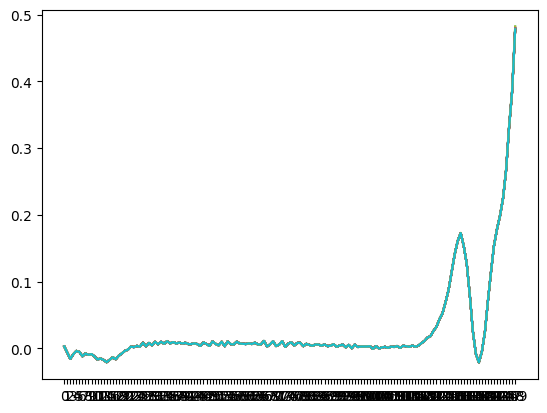

In [ ]:
plt.plot(data_synn.head(30).T)